In [2]:
%matplotlib inline

import os

import torch
import torch.nn as nn

from networks import pose_feature_net



os.environ['CUDA_VISIBLE_DEVICES']='3'

pose_feature_net = pose_feature_net.PoseFeatureNet()
pose_feature_net = torch.nn.DataParallel(pose_feature_net).cuda()
print ('pose_feature_net --> num_stacks?', pose_feature_net.module.num_stacks)

pose_feature_net

('pose_feature_net --> num_stacks?', 1)


DataParallel (
  (module): PoseFeatureNet (
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU (inplace)
    (layer1): Sequential (
      (0): Bottleneck (
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (conv3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU (inplace)
        (downsample): Sequential (
          (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        )
      )
    )
    (layer2): Sequential (
      (0): Bottleneck (
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(128, 128,

Loading pickle: /home/ubuntu/cvlab/pytorch/Sub-JHMDB_pose_stream/get_train_test_split/dic_train.pickle ...
('images size?', torch.Size([1, 3, 256, 256]))

('features_numpy type?', <type 'numpy.ndarray'>)
('features_numpy.shape', (1, 256, 64, 64))


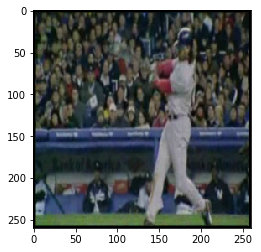

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

from utils.datasets import jhmdb
from utils import pickle_tools



def my_imshow(img):
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

jhmdb_dict_path = '/home/ubuntu/cvlab/pytorch/Sub-JHMDB_pose_stream/get_train_test_split/dic_train.pickle'
jhmdb_dict = pickle_tools.load_pickle(jhmdb_dict_path)

jhmdb_rgb_root = '/home/ubuntu/data/JHMDB/Rename_Images'
train_set = jhmdb.JhmdbRgbData(jhmdb_dict, jhmdb_rgb_root, transform=transforms.Compose([
                transforms.Scale([256, 256]),
                transforms.ToTensor()
                ]))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=False, num_workers=2)

# get some training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images_cpu = images.cpu()

# show images
my_imshow(torchvision.utils.make_grid(images))
print('images size?', images.size())
print

# try using pose_feature_net to extract feature
features = pose_feature_net(Variable(images))
#print('features type?', type(features))
#print('features len?', len(features))

features_numpy = features[0].data.cpu().numpy()
print('features_numpy type?', type(features_numpy))
print('features_numpy.shape', features_numpy.shape)